## Projeto de Mineração de Dados
 
 - Leitura dos áudios;
 - Processamento através de MEL-frequency Ceptral Coeficients;
 - Amostragem e plotagem das frequências em gráfico comparativo.
 

In [153]:
import os
import librosa
import librosa.display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydub import AudioSegment
from pydub.silence import split_on_silence

from sklearn.datasets import load_digits

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit, validation_curve, GridSearchCV

### Pastas dos Datasets

In [52]:
train_folder = 'base_treinamento_I'
train_path = os.path.abspath(train_folder)

validation_folder = 'base_validacao_I'
validation_path = os.path.abspath(validation_folder)

test_folder = 'amostras'
test_path = os.path.abspath(test_folder)

### Métodos de extração de features e classificação

- Extração das features dos labels e dos áudios;
- Classificador de áudios com Support Vector Machines com kernel Radial Basis Function;
- Método para fazer o gráfico dos resultados.

In [145]:
def extract_features(path):
    rows = list()
    features = list()

    for root, dirs, filenames in os.walk(path):
        for f in filenames:
            t2 = 2000
            newAudio1 = AudioSegment.from_wav("{0}/{1}".format(path,f))
            print(newAudio1)
            label = f.split('.wav')[0]
            label_to_list(label)
            newAudio1 = newAudio1[:t2]
            charAudio1 = './audios_char/{0}.wav'.format(label[0])
            try:
                newAudio1.export(charAudio1, format="wav")
                features=audio_features(charAudio1)
                rows.append([label[0],
                            newAudio1,
                            charAudio1,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])
            except:
                features=audio_features(charAudio1)
                rows.append([label[0],
                            newAudio1,
                            charAudio1,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])
            t3 = 2000 
            t4 = 4000
            newAudio2 = AudioSegment.from_wav("{0}/{1}".format(path,f))
            newAudio2 = newAudio2[t3:t4]
            charAudio2 = './audios_char/{0}.wav'.format(label[1])
            try:
                newAudio2.export(charAudio2, format="wav")
                features=audio_features(charAudio2)
                rows.append([label[1],
                            newAudio2,
                            charAudio2,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])
            except:
                features=audio_features(charAudio2)
                rows.append([label[1],
                            newAudio2,
                            charAudio2,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])

            t5 = 4000
            t6 = 6000
            newAudio3 = AudioSegment.from_wav("{0}/{1}".format(path,f))
            charAudio3 = './audios_char/{0}.wav'.format(label[2])
            try:
                newAudio3.export(charAudio3, format="wav")
                features=audio_features(charAudio3)
                rows.append([label[2],
                            newAudio3,
                            charAudio3,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])
            except:
                features=audio_features(charAudio3)
                rows.append([label[2],
                            newAudio3,
                            charAudio3,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])

            t7 = 6000
            newAudio4 = AudioSegment.from_wav("{0}/{1}".format(path,f))
            newAudio4 = newAudio4[t7:]
            charAudio4 = './audios_char/{0}.wav'.format(label[2])
            try:
                newAudio4.export(charAudio4, format="wav")
                features=audio_features(charAudio4)
                rows.append([label[3],
                            newAudio4,
                            charAudio4,
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])
            except:
                features=audio_features(charAudio4)
                rows.append([label[3],
                            newAudio4,
                            charAudio4, 
                            features[0],features[1],features[2],features[3],
                            features[4],features[5],features[6],features[7],
                            features[8],features[9]
                            ])

    return pd.DataFrame(rows, columns=['Label', 'Audio object', 
                                       'Audio file', 'Feature1', 
                                       'Feature2', 'Feature3', 
                                       'Feature4', 'Feature5', 
                                       'Feature6', 'Feature7', 
                                       'Feature8','Feature9', 
                                       'Feature10'])

def audio_features(filename):
    
    data, fs = librosa.load(filename, None)
    librosa.display.waveplot(data, sr=fs)
    hop_length = 512
    mfcc = librosa.feature.mfcc(data,  sr=fs, hop_length=hop_length, n_mfcc=10)
    
    return np.array(np.mean(mfcc.T, axis=0))

    Label                                       Audio object  \
0       n  (((<pydub.audio_segment.AudioSegment object at...   
1       x  (((<pydub.audio_segment.AudioSegment object at...   
2       d  (((<pydub.audio_segment.AudioSegment object at...   
3       b  (((<pydub.audio_segment.AudioSegment object at...   
4       c  (((<pydub.audio_segment.AudioSegment object at...   
5       x  (((<pydub.audio_segment.AudioSegment object at...   
6       x  (((<pydub.audio_segment.AudioSegment object at...   
7       d  (((<pydub.audio_segment.AudioSegment object at...   
8       c  (((<pydub.audio_segment.AudioSegment object at...   
9       6  (((<pydub.audio_segment.AudioSegment object at...   
10      b  (((<pydub.audio_segment.AudioSegment object at...   
11      7  (((<pydub.audio_segment.AudioSegment object at...   
12      d  (((<pydub.audio_segment.AudioSegment object at...   
13      h  (((<pydub.audio_segment.AudioSegment object at...   
14      d  (((<pydub.audio_segment.Audio

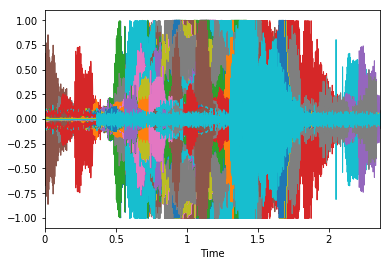

In [146]:
df = extract_features(train_path)
df.to_csv('./train_dataset.csv', sep='\t')
print(df)

In [148]:
X_train = df[['Feature1', 'Feature2', 
              'Feature3', 'Feature4',
              'Feature5', 'Feature6', 
              'Feature7', 'Feature8',
              'Feature9', 'Feature10']].values
Y_train = df['Label'].values
print(X_train)
print(Y_train)

[[-4.17305208e+02  1.39223158e+02  2.33479128e+01 ... -8.98084636e+00
   1.11142397e+00 -8.22364993e-01]
 [-6.31238180e+02  1.19646498e+02 -4.99802274e+00 ...  8.91219567e+00
  -2.86461780e+00 -1.73138419e+00]
 [-4.75484250e+02  7.61037583e+01  1.62049338e+01 ...  4.97114792e+00
   2.54643542e+00  3.53792858e+00]
 ...
 [-6.03928818e+02  1.31556742e+02  2.29043575e+01 ...  8.39567181e-01
  -2.34365708e+00  2.16252606e+00]
 [-3.98799630e+02  5.61599328e+01  1.67341281e+01 ... -2.88988954e-01
   4.20942811e+00  2.83186460e+00]
 [-2.91934080e+02  1.11672215e+02  3.63220725e+01 ... -3.61910397e+00
   5.55838676e+00  2.39428307e+00]]
['n' 'x' 'd' 'b' 'c' 'x' 'x' 'd' 'c' '6' 'b' '7' 'd' 'h' 'd' 'h' 'x' 'n'
 'm' 'd' 'h' 'a' 'a' 'm' 'n' 'b' 'x' 'm' 'x' 'n' 'c' 'n' 'h' '6' '7' 'b'
 'b' 'b' '7' 'h' 'm' 'a' 'a' '6' 'n' 'x' 'h' '6' 'b' 'n' 'm' 'a' 'm' '6'
 'c' 'c' 'h' '7' 'h' 'h' 'm' 'a' '6' '7' 'n' 'b' 'm' 'n' 'h' 'a' 'a' 'n'
 'a' 'c' 'n' 'x' 'b' 'x' 'd' 'a' 'n' '7' 'c' 'x' 'n' 'n' 'a' '7' 'x' '7'

### Modelo SVC
- GridSearch nos hyperparâmetros do modelo;
- Treino com modelo SVC;
- Cross validation no dataset de treino.

In [151]:
svc = svm.SVC(kernel='rbf', C=20)
svc.get_params()

{'C': 20,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [159]:
parameters = {'kernel':('linear', 'rbf', 'linear', 'poly', 'sigmoid'), 
              'C':[1, 10, 100, 1000]}
svc_g = GridSearchCV(svc, parameters)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
scores_treino = cross_val_score(
    svc_g, 
    X_train, 
    Y_train, 
    cv=cv)
print('Score de treino:')
print(scores_treino)

### Dataset de Validação

In [ ]:
df2 = extract_features(validation_path)
df2.to_csv('./val_dataset.csv', sep='\t')
print(df2)

In [ ]:
X_val = df[['Feature1', 'Feature2', 
              'Feature3', 'Feature4',
              'Feature5', 'Feature6', 
              'Feature7', 'Feature8',
              'Feature9', 'Feature10']].values
Y_val = df['Label'].values
print(X_val)
print(Y_val)

In [51]:
model_svc = svm.SVC(kernel='rbf', C=20)
model_svc.fit(X_train, Y_train)
score = model_svc.predict(X_val)
accuracy = accuracy_score(score, Y_val)
print('Score de validação:')
print(accuracy)

Score de validação:
0.10884353741496598


### Dataset de Teste

In [ ]:
df3 = extract_features(test_path)
df3.to_csv('./test_dataset.csv', sep='\t')
print(df3)

In [ ]:
X_test = df[['Feature1', 'Feature2', 
              'Feature3', 'Feature4',
              'Feature5', 'Feature6', 
              'Feature7', 'Feature8',
              'Feature9', 'Feature10']].values
Y_test = df['Label'].values
print(X_test)
print(Y_test)

In [ ]:
score = svc_g.predict(X_test)
accuracy = accuracy_score(score, Y_test)
print('Score de Test:')
print(accuracy)